### Importing useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Converts index with dates to datetime and sets the frequency
def index_to_date(ser, f='D'):
    ser.index = pd.to_datetime(ser.index)
    ser.index.freq = f

In [3]:
def daily_increase(data):
    inc = [] 
    for i in range(len(data)):
        if i == 0:
            inc.append(data[0])
        else:
            inc.append(data[i]-data[i-1])
    return inc 

In [4]:
def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

In [5]:
from statsmodels.tsa.stattools import adfuller
#Augmented Dickey-Fuller test
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

### Importing Libraries and Data

In [6]:
data_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
data_dead = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv" )
data_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [7]:
data_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748


In [8]:
print(data_cases.shape,data_dead.shape,data_recovered.shape) 

(278, 521) (278, 521) (263, 521)


In [9]:
df = data_cases.groupby('Country/Region').sum()
df_dead = data_dead.groupby('Country/Region').sum()
df_recovered = data_recovered.groupby('Country/Region').sum()

In [10]:
print(df.shape,df_dead.shape,df_recovered.shape) 

(194, 519) (194, 519) (194, 519)


In [11]:
time_series = df.loc[:,"1/22/20":]
time_series_dead = df_dead.loc[:,"1/22/20":]
time_series_recovered = df_recovered.loc[:,"1/22/20":]


### Preparing Dataset 
<i> India and Global </i>

In [ ]:
Global = time_series[:].sum()
Global_train = Global[:(len(Global.index)-30)]
Global_test = Global[(len(Global.index)-30):]

India = time_series.loc['India']
India_train = India[:(len(Global.index)-30)]
India_test = India[(len(Global.index)-30):]

In [ ]:
Global_train.index = pd.to_datetime(Global_train.index)
Global_test.index = pd.to_datetime(Global_test.index)

In [ ]:
total_cases_country = df.loc[:,df.columns[-1]]
top5 = total_cases_country.sort_values()[-5:]
bottom5 = total_cases_country.sort_values()[:5]

In [ ]:
total_cases_country[total_cases_country == 0] 

Series([], Name: 11/24/20, dtype: int64)

### Exploratory Data Analysis

Text(0, 0.5, 'cases')

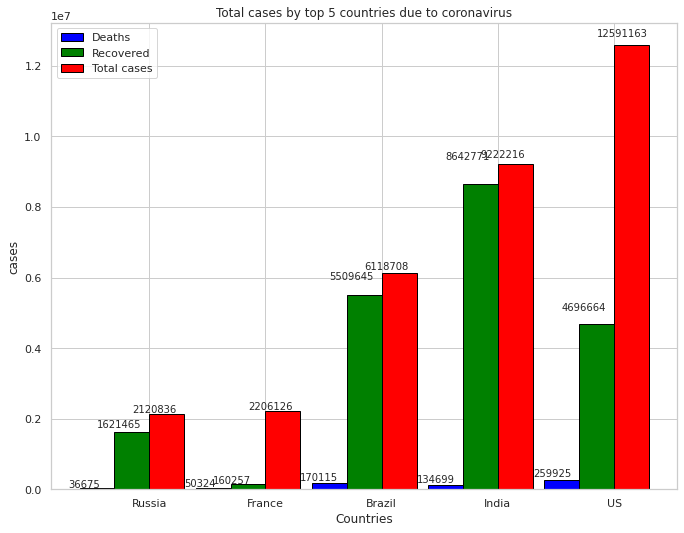

In [ ]:
sns.set()
sns.set_style("whitegrid")

plt.figure(figsize = (10,8))

plt.bar(np.arange(5)-0.3  , time_series_dead.loc[top5.index][df.columns[-1]].values ,width= 0.3, align='center',color='blue', edgecolor = 'black')
plt.bar(np.arange(5)  , time_series_recovered.loc[top5.index][df.columns[-1]].values, width= 0.3, align='center',color='green', edgecolor = 'black')
plt.bar(np.arange(5)+0.3, top5.values, width= 0.3, align='center',color='red', edgecolor = 'black')

for i in range(5):
    plt.annotate(top5[i],(  i, top5[i]*1.02), fontsize =10)
    plt.annotate(time_series_recovered.loc[top5.index][df.columns[-1]][i], (  -0.3 + i, time_series_recovered.loc[top5.index][df.columns[-1]][i]*1.08), fontsize = 10)
    plt.annotate(time_series_dead.loc[top5.index][df.columns[-1]][i], (-0.55 +  i, time_series_dead.loc[top5.index][df.columns[-1]][i]*1.4), fontsize = 10)

plt.legend(labels = ['Deaths','Recovered','Total cases'])
plt.title("Total cases by top 5 countries due to coronavirus")
plt.xlabel('Countries')
plt.xticks(np.arange(5) + 0.3/ 2, top5.index)
plt.ylabel('cases')




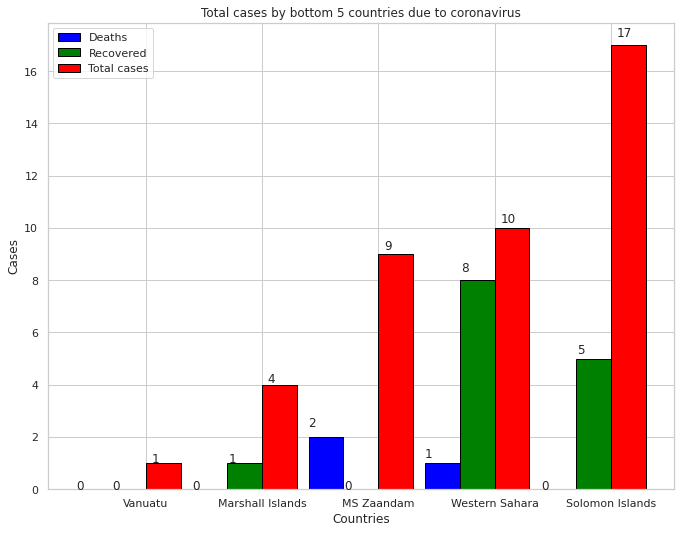

In [ ]:
sns.set()
sns.set_style("whitegrid")

plt.figure(figsize= (10,8))

plt.bar(np.arange(5)-0.3  , time_series_dead.loc[bottom5.index][df.columns[-1]].values ,width= 0.3, align='center',color='blue', edgecolor = 'black')
plt.bar(np.arange(5)  , time_series_recovered.loc[bottom5.index][df.columns[-1]].values, width= 0.3, align='center',color='green', edgecolor = 'black')
plt.bar(np.arange(5)+0.3, bottom5.values, width= 0.3, align='center',color='red', edgecolor = 'black')

for i in range(5):
    plt.annotate(bottom5[i], ( 0.2 + i, bottom5[i]*1.02))
    plt.annotate(time_series_recovered.loc[bottom5.index][df.columns[-1]][i], ( -0.14 + i, time_series_recovered.loc[bottom5.index][df.columns[-1]][i]*1.04))
    plt.annotate(time_series_dead.loc[bottom5.index][df.columns[-1]][i], (-0.45 +  i, time_series_dead.loc[bottom5.index][df.columns[-1]][i]*1.2))

plt.legend(labels = ['Deaths','Recovered','Total cases'])
plt.title("Total cases by bottom 5 countries due to coronavirus")
plt.xlabel('Countries')
plt.ylabel('Cases')
plt.xticks(np.arange(5) + 0.3/ 2, bottom5.index)
plt.show()

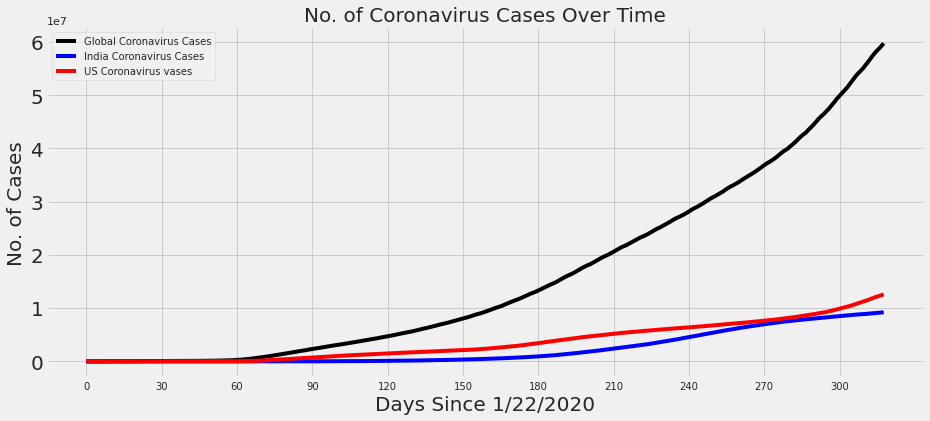

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14, 6))
plt.plot(Global.index, Global.values,color = 'black')

plt.plot(  India.index, India.values , color='blue')
plt.plot( Global.index, time_series.loc['US'].values, color ='red')

plt.title('No. of Coronavirus Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No. of Cases', size=20)
plt.legend(['Global Coronavirus Cases', 'India Coronavirus Cases','US Coronavirus vases'], prop={'size': 10})
plt.xticks(Global.index[np.linspace(0,290,11).astype(int)], np.linspace(0,300,11).astype(int) ,size=10)
plt.yticks(size=20)
plt.show()

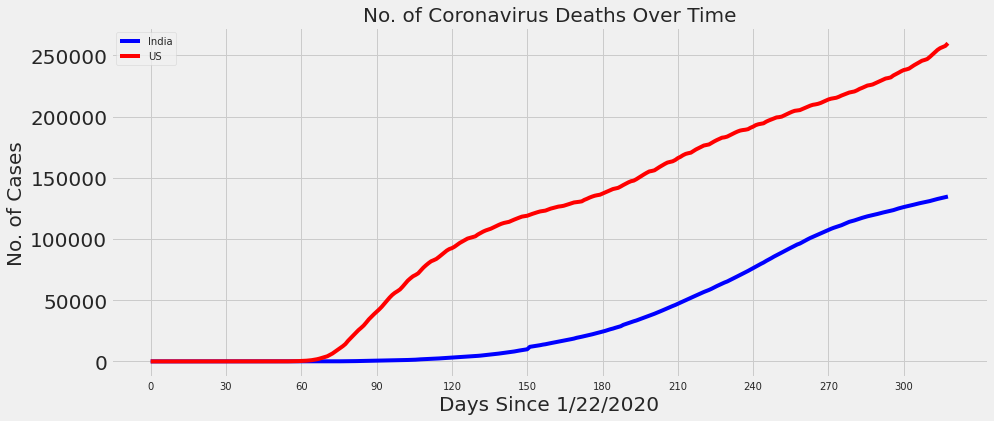

In [ ]:
 
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14, 6))
\

plt.plot(  India.index, time_series_dead.loc['India'].values , color='blue')
plt.plot( Global.index, time_series_dead.loc['US'].values, color ='red')

plt.title('No. of Coronavirus Deaths Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No. of Cases', size=20)
plt.legend(['India','US'], prop={'size': 10})
plt.xticks(Global.index[np.linspace(0,290,11).astype(int)], np.linspace(0,300,11).astype(int) ,size=10)
plt.yticks(size=20)
plt.show()

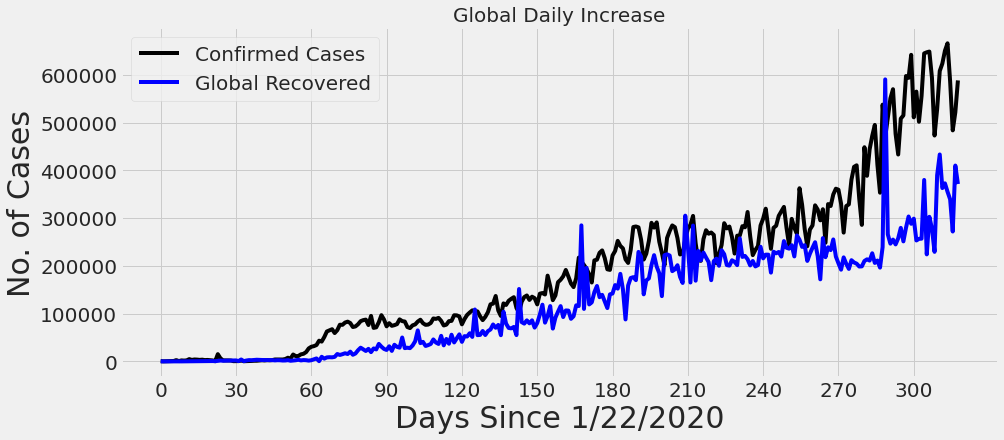

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14, 6))
plt.plot(Global.index, daily_increase(Global),color = 'black')
plt.plot(Global.index, daily_increase(time_series_recovered.sum()),color = 'blue')
#plt.plot(Global.index, daily_increase(time_series_dead.sum()),color = 'red')

plt.title('Global Daily Increase', size=20)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No. of Cases', size=30)
plt.legend(['Confirmed Cases', 'Global Recovered'], prop={'size': 20})
plt.xticks(Global.index[np.linspace(0,290,11).astype(int)], np.linspace(0,300,11).astype(int) ,size=20)

plt.yticks(size=20)
plt.show()

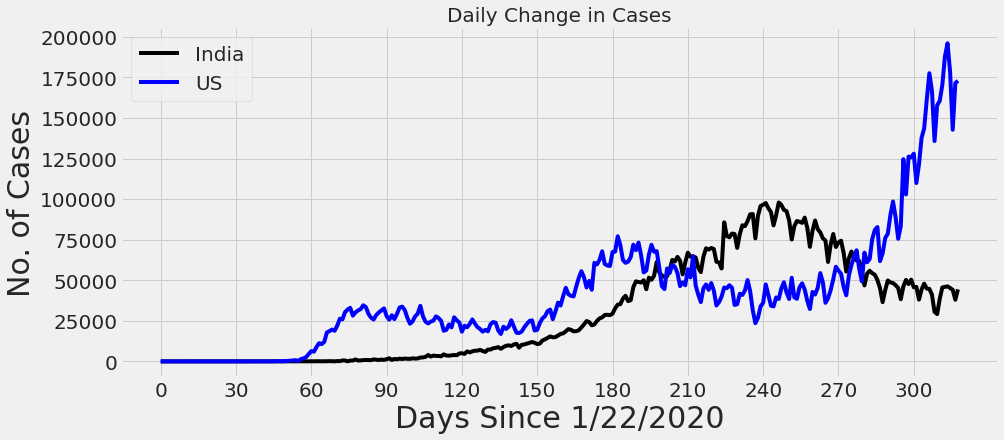

In [ ]:
 
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14, 6))
plt.plot(Global.index, daily_increase(India),color = 'black')
plt.plot(Global.index, daily_increase(time_series.loc['US'].values),color = 'blue')


plt.title('Daily Change in Cases', size=20)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No. of Cases', size=30)
plt.legend(['India', 'US'], prop={'size': 20})
plt.xticks(Global.index[np.linspace(0,290,11).astype(int)], np.linspace(0,300,11).astype(int) ,size=20)

plt.yticks(size=20)
plt.show()

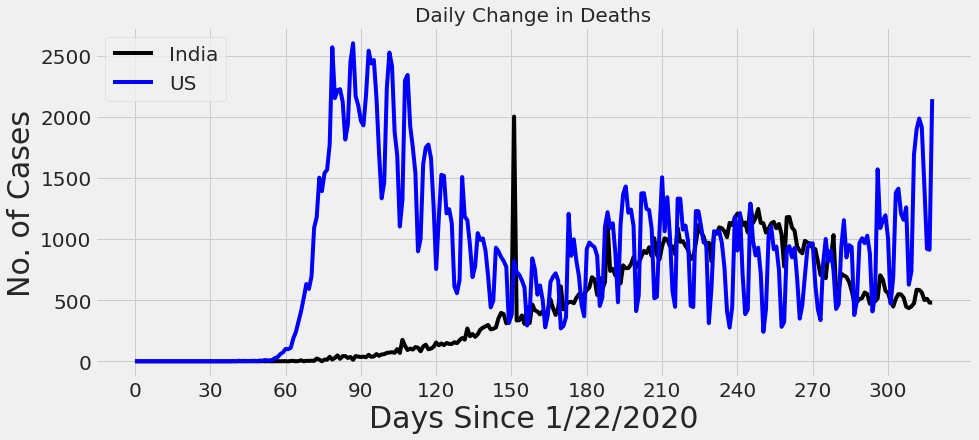

In [ ]:
 plt.style.use('fivethirtyeight')

plt.figure(figsize=(14, 6))
plt.plot(Global.index, daily_increase(time_series_dead.loc['India'].values),color = 'black')
plt.plot(Global.index, daily_increase(time_series_dead.loc['US'].values),color = 'blue')


plt.title('Daily Change in Deaths', size=20)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No. of Cases', size=30)
plt.legend(['India', 'US'], prop={'size': 20})
plt.xticks(Global.index[np.linspace(0,290,11).astype(int)], np.linspace(0,300,11).astype(int) ,size=20)

plt.yticks(size=20)
plt.show()

In [ ]:
inc_case = []
inc_death = []
inc_recovered = []
for i in top5.index:
  inc_case.append(max(daily_increase(time_series.loc[i])))
  inc_death.append(max(daily_increase(time_series_dead.loc[i])))
  inc_recovered.append(max(daily_increase(time_series_recovered.loc[i])))

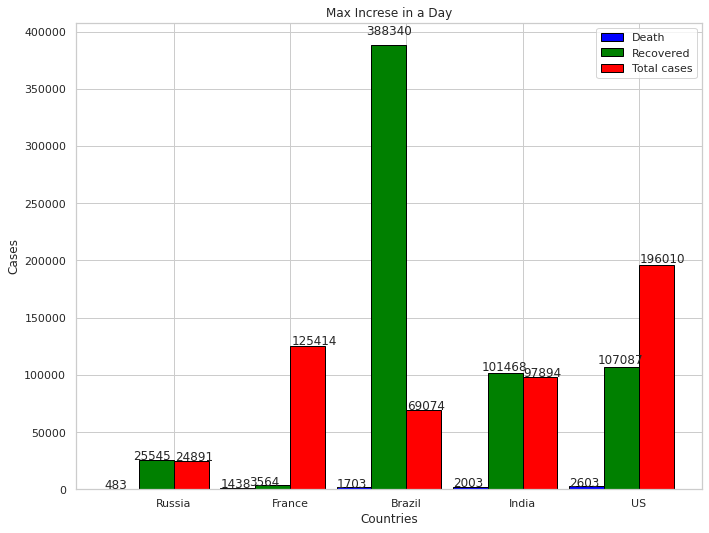

In [ ]:
sns.set()
sns.set_style("whitegrid")

plt.figure(figsize= (10,8))

plt.bar(np.arange(5)-0.3  , inc_death ,width= 0.3, align='center',color='blue', edgecolor = 'black')
plt.bar(np.arange(5)  , inc_recovered, width= 0.3, align='center',color='green', edgecolor = 'black')
plt.bar(np.arange(5) + 0.3, inc_case, width= 0.3, align='center',color='red', edgecolor = 'black')

for i in range(5):
    plt.annotate(inc_case[i], ( 0.16 + i, inc_case[i]*1.01))
    plt.annotate(inc_death[i], ( -0.45 + i, inc_death[i]*1.02))
    plt.annotate(inc_recovered[i], ( -0.2 + i, inc_recovered[i]*1.023))

plt.legend(labels = ['Death','Recovered','Total cases'])
plt.title("Max Increse in a Day")
plt.xlabel('Countries')
plt.ylabel('Cases')
plt.xticks(np.arange(5) + 0.3/ 2, top5.index)
plt.show()

## Moving Average

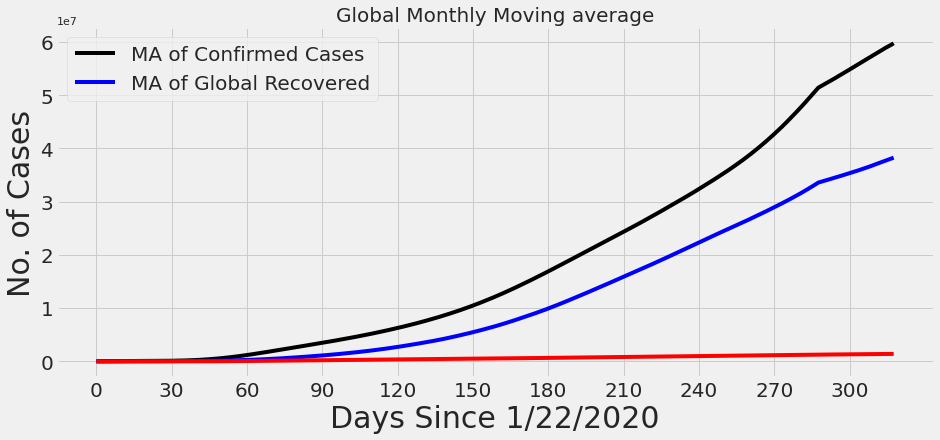

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14, 6))
plt.plot(Global.index, moving_average(Global,30),color = 'black')
plt.plot(Global.index, moving_average(time_series_recovered.sum(),30),color = 'blue')
plt.plot(Global.index, moving_average(time_series_dead.sum(),30),color = 'red')

plt.title('Global Monthly Moving average', size=20)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No. of Cases', size=30)
plt.legend(['MA of Confirmed Cases', 'MA of Global Recovered'], prop={'size': 20})
plt.xticks(Global.index[np.linspace(0,290,11).astype(int)], np.linspace(0,300,11).astype(int) ,size=20)

plt.yticks(size=20);

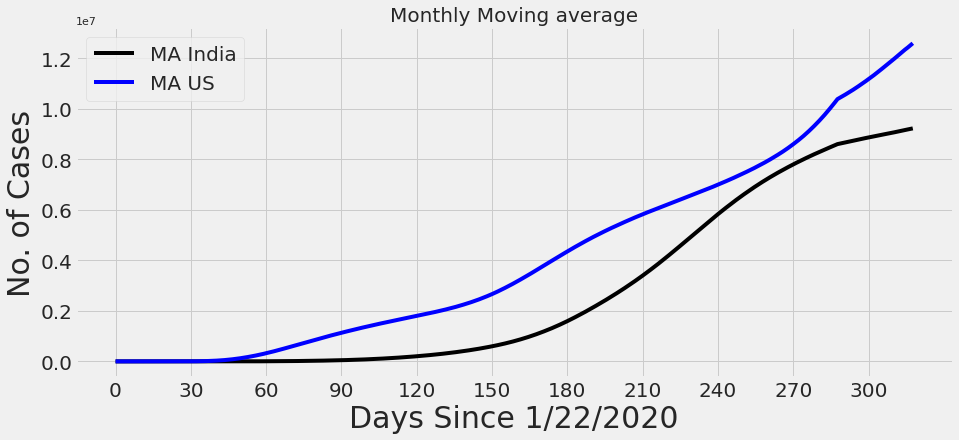

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14, 6))
plt.plot(Global.index, moving_average(India,30),color = 'black')
plt.plot(Global.index, moving_average(time_series.loc['US'].values,30),color = 'blue')

plt.title('Monthly Moving average', size=20)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No. of Cases', size=30)
plt.legend(['MA India', 'MA US'], prop={'size': 20})
plt.xticks(Global.index[np.linspace(0,290,11).astype(int)], np.linspace(0,300,11).astype(int) ,size=20)

plt.yticks(size=20);

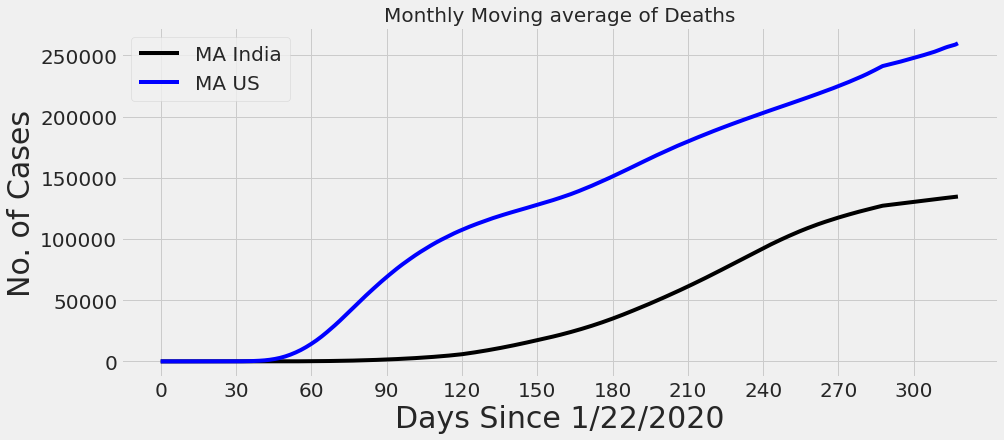

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14, 6))
plt.plot(Global.index, moving_average(time_series_dead.loc['India'].values,30),color = 'black')
plt.plot(Global.index, moving_average(time_series_dead.loc['US'].values,30),color = 'blue')


plt.title('Monthly Moving average of Deaths', size=20)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No. of Cases', size=30)
plt.legend(['MA India', 'MA US'], prop={'size': 20})
plt.xticks(Global.index[np.linspace(0,290,11).astype(int)], np.linspace(0,300,11).astype(int) ,size=20)

plt.yticks(size=20);

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_NB = GaussianNB()
model_NB.fit( np.arange(len(Global_train.index)).reshape(-1,1), Global_train.values)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
NB_Global = model_NB.predict(np.linspace(len(Global_train.index),len(Global.index)-1,30).reshape(-1,1))


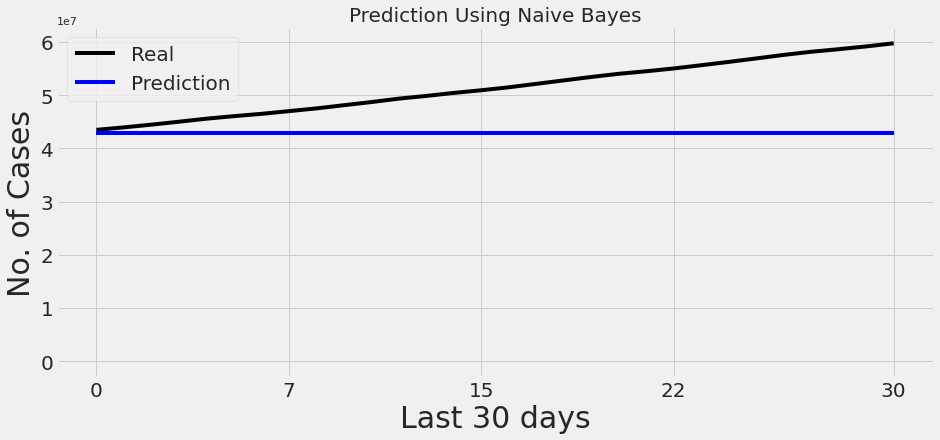

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14, 6))
plt.plot(Global_test.index, Global_test.values,color = 'black')
plt.plot(Global_test.index, NB_Global.reshape(-1,1),30,color = 'blue')

plt.title('Prediction Using Naive Bayes', size=20)
plt.xlabel('Last 30 days', size=30)
plt.ylabel('No. of Cases', size=30)
plt.legend(['Real', 'Prediction'], prop={'size': 20})
plt.xticks(Global_test.index[np.linspace(0,29,5).astype(int)], np.linspace(0,30,5).astype(int) ,size=20)

plt.yticks(size=20);

#### Adjusting index to datetime

In [ ]:
Global_train

1/22/20          555
1/23/20          654
1/24/20          941
1/25/20         1434
1/26/20         2118
              ...   
10/21/20    41224485
10/22/20    41696807
10/23/20    42192016
10/24/20    42603760
10/25/20    42957052
Length: 278, dtype: int64

In [ ]:
Global_train.index = pd.to_datetime(Global_train.index)

In [ ]:
Global_test.index = pd.to_datetime(Global_test.index)

#### Setting frequency for the index

In [ ]:
Global_train.index.freq = 'D'

In [ ]:
Global_test.index.freq = 'D'

In [ ]:
Global_train

2020-01-22         555
2020-01-23         654
2020-01-24         941
2020-01-25        1434
2020-01-26        2118
                ...   
2020-10-21    41224485
2020-10-22    41696807
2020-10-23    42192016
2020-10-24    42603760
2020-10-25    42957052
Freq: D, Length: 278, dtype: int64

In [ ]:
Global_test

2020-10-26    43494699
2020-10-27    43964015
2020-10-28    44473376
2020-10-29    45024129
2020-10-30    45594086
2020-10-31    46070463
2020-11-01    46503704
2020-11-02    47012165
2020-11-03    47527270
2020-11-04    48124824
2020-11-05    48718539
2020-11-06    49360492
2020-11-07    49871598
2020-11-08    50436547
2020-11-09    50938348
2020-11-10    51494283
2020-11-11    52139269
2020-11-12    52786566
2020-11-13    53435351
2020-11-14    54029326
2020-11-15    54502332
2020-11-16    55030781
2020-11-17    55638883
2020-11-18    56262553
2020-11-19    56913120
2020-11-20    57579266
2020-11-21    58165570
2020-11-22    58649369
2020-11-23    59171078
2020-11-24    59759494
Freq: D, dtype: int64

## Using Statsmodels to get the trend
<div class="alert alert-info"><h3>Related Function:</h3>
<tt><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html'><strong>statsmodels.tsa.filters.hp_filter.hpfilter</strong></a><font color=black>(X, lamb=1600)</font>&nbsp;&nbsp;Hodrick-Prescott filter</div>
    
The <a href='https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter'>Hodrick-Prescott filter</a> separates a time-series  $y_t$ into a trend component $\tau_t$ and a cyclical component $c_t$

$y_t = \tau_t + c_t$

The components are determined by minimizing the following quadratic loss function, where $\lambda$ is a smoothing parameter:

$\min_{\\{ \tau_{t}\\} }\sum_{t=1}^{T}c_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$


The $\lambda$ value above handles variations in the growth rate of the trend component.<br>When analyzing quarterly data, the default lambda value of 1600 is recommended. Use 6.25 for annual data, 1.109e11 for daily data and 129,600 for monthly data.
    

In [ ]:
lamb = 1.109306289e11

In [ ]:
lamb

110930628900.0

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [ ]:
global_cycle, global_trend = hpfilter(Global_train, lamb = lamb)

In [ ]:
global_cycle

2020-01-22    8.494239e+06
2020-01-23    8.344215e+06
2020-01-24    8.194379e+06
2020-01-25    8.044749e+06
2020-01-26    7.895311e+06
                  ...     
2020-10-21    8.730578e+06
2020-10-22    9.052747e+06
2020-10-23    9.397803e+06
2020-10-24    9.659393e+06
2020-10-25    9.862532e+06
Freq: D, Name: cycle, Length: 278, dtype: float64

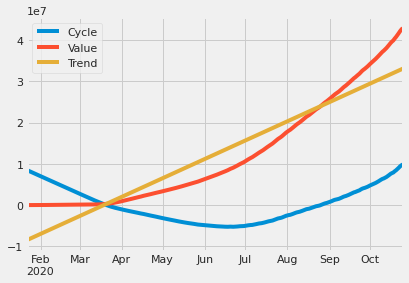

In [ ]:
global_cycle.plot(label='Cycle')
Global_train.plot(label='Value')
global_trend.plot(label='Trend')
plt.legend()

In [ ]:
global_df = pd.concat([Global_train, global_trend, global_cycle], axis=1)

In [ ]:
global_df.columns = ['Values', 'Trend', 'Cycle']

# Tests for Stationarity
A time series is <em>stationary</em> if the mean and variance are fixed between any two equidistant points. That is, no matter where you take your observations, the results should be the same. A times series that shows seasonality is <em>not</em> stationary.

A test for stationarity usually involves a <a href='https://en.wikipedia.org/wiki/Unit_root_test'>unit root</a> hypothesis test, where the null hypothesis $H_0$ is that the series is <em>nonstationary</em>, and contains a unit root. The alternate hypothesis $H_1$ supports stationarity. The <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>augmented Dickey-Fuller</a> and <a href='https://en.wikipedia.org/wiki/KPSS_test'>Kwiatkowski-Phillips-Schmidt-Shin</a> tests are stationarity tests. 

## Augmented Dickey-Fuller Test
To determine whether a series is stationary we can use the <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>augmented Dickey-Fuller Test</a>. In this test the null hypothesis states that $\phi = 1$ (this is also called a unit test). The test returns several statistics we'll see in a moment. Our focus is on the p-value. A small p-value ($p<0.05$) indicates strong evidence against the null hypothesis.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

# ARMA(p,q) and ARIMA(p,d,q)
# Autoregressive Moving Averages

Recall that an <strong>AR(1)</strong> model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

while an <strong>MA(1)</strong> model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = \mu + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

where $c$ is a constant, $\mu$ is the expectation of $y_{t}$ (often assumed to be zero), $\phi_1$ (phi-sub-one) is the AR lag coefficient, $\theta_1$ (theta-sub-one) is the MA lag coefficient, and $\varepsilon$ (epsilon) is white noise.

An <strong>ARMA(1,1)</strong> model therefore follows

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

ARMA models can be used on stationary datasets.

For non-stationary datasets with a trend component, ARIMA models apply a differencing coefficient as well.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMA.html'>arima_model.ARMA</a></strong><font color=black>(endog, order[, exog, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Autoregressive Moving Average ARMA(p,q) model<br>
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMAResults.html'>arima_model.ARMAResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;&nbsp;Class to hold results from fitting an ARMA model<br>
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html'>arima_model.ARIMA</a></strong><font color=black>(endog, order[, exog, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;Autoregressive Integrated Moving Average ARIMA(p,d,q) model<br>
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.html'>arima_model.ARIMAResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;Class to hold results from fitting an ARIMA model<br>	
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.kalmanf.kalmanfilter.KalmanFilter.html'>kalmanf.kalmanfilter.KalmanFilter</a></strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Kalman Filter code intended for use with the ARMA model</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive–moving-average model</font><br>
<strong>
<a href='https://otexts.com/fpp2/non-seasonal-arima.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Non-seasonal ARIMA models</font></div>

In [ ]:
#!pip install pmdarima

In [ ]:
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

In [ ]:
adf_test(global_df['Values'])

Augmented Dickey-Fuller Test: 
ADF test statistic        2.015533
p-value                   0.998693
# lags used              16.000000
# observations          261.000000
critical value (1%)      -3.455656
critical value (5%)      -2.872678
critical value (10%)     -2.572705
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [ ]:
auto_arima(global_df['Values'],seasonal=True).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmo

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  278
Model:               SARIMAX(5, 2, 3)   Log Likelihood               -3064.575
Date:                Wed, 25 Nov 2020   AIC                           6149.150
Time:                        06:37:52   BIC                           6185.354
Sample:                             0   HQIC                          6163.678
                                - 278                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3609.1764   1123.039      3.214      0.001    1408.061    5810.291
ar.L1          0.3783      0.163      2.317      0.021       0.058       0.698
ar.L2         -0.6827      0.094     -7.266      0.000      -0.867      -0.499
ar.L3         -0.3005      0.101     -2.982      0.003      -0.498      -0.103
ar.L4         -0.2841      0.065     -4.398      0.000      -0.411      -0.157
ar.L5         -0.3745      0.088     -4.241      0.000      -0.548      -0.201
ma.L1         -1.1822      0.175     -6.768      0.000      -1.525      -0.840
ma.L2          1.0126      0.204      4.958      0.000       0.612       1.413
ma.L3         -0.1101      0.162     -0.678      0.497      -0.428       0.208
sigma2      3.333e+08      0.020   1.67e+10      0.000    3.33e+08    3.33e+08
===================================================================================
Ljung-Box (Q):                      102.23   Jarque-Bera (JB):              1671.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              13.94   Skew:                             1.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.19e+25. Standard errors may be unstable.
"""

# SARIMA(p,d,q)(P,D,Q)m
# Seasonal Autoregressive Integrated Moving Averages
Where ARIMA accepts the parameters $(p,d,q)$, SARIMA accepts an <em>additional</em> set of parameters $(P,D,Q)m$ that specifically describe the seasonal components of the model. Here $P$, $D$ and $Q$ represent the seasonal regression, differencing and moving average coefficients, and $m$ represents the number of data points (rows) in each seasonal cycle.

<strong>NOTE:</strong> The statsmodels implementation of SARIMA is called SARIMAX. The “X” added to the name means that the function also supports <em>exogenous</em> regressor variables.


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

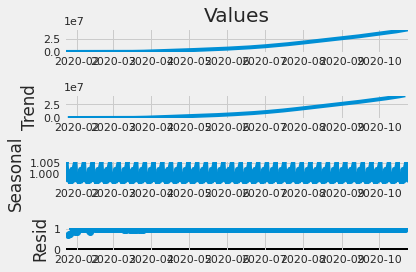

In [ ]:
result = seasonal_decompose(global_df['Values'], model='mul')
result.plot;

In [ ]:
auto_arima(global_df['Values'], seasonal=True, m=7).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmo

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  278
Model:             SARIMAX(3, 2, 2)x(1, 0, [1], 7)   Log Likelihood               -3050.914
Date:                             Wed, 25 Nov 2020   AIC                           6117.828
Time:                                     06:38:39   BIC                           6146.791
Sample:                                          0   HQIC                          6129.450
                                             - 278                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2951      1.014      0.291      0.771      -1.692       2.282
ar.L2         -0.2280      0.242     -0.943      0.345      -0.702       0.246
ar.L3          0.0021      0.294      0.007      0.994      -0.574       0.578
ma.L1         -0.9959      1.014     -0.982      0.326      -2.984       0.992
ma.L2          0.3581      0.510      0.702      0.483      -0.642       1.358
ar.S.L7        0.9731      0.025     38.395      0.000       0.923       1.023
ma.S.L7       -0.5005      0.108     -4.623      0.000      -0.713      -0.288
sigma2      3.567e+08   1.49e-09   2.39e+17      0.000    3.57e+08    3.57e+08
===================================================================================
Ljung-Box (Q):                       45.14   Jarque-Bera (JB):               455.94
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):              14.32   Skew:                             1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.59e+34. Standard errors may be unstable.
"""

This provides an ARIMA Order of (5,2,3) combined with a seasonal order of (1,0,[1, 2],7) Now let's train & test the SARIMAX(5,2,3)(1,0,[1, 2],7) model, evaluate it, then produce a forecast of future values.

In [ ]:
model = SARIMAX(global_df['Values'],order=(5,2,3),seasonal_order=(1,0,[1, 2],7))
results = model.fit()
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                 Values   No. Observations:                  278
Model:             SARIMAX(5, 2, 3)x(1, 0, [1, 2], 7)   Log Likelihood               -3045.020
Date:                                Wed, 25 Nov 2020   AIC                           6114.040
Time:                                        06:38:44   BIC                           6157.485
Sample:                                    01-22-2020   HQIC                          6131.474
                                         - 10-25-2020                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5263      0.760      0.693      0.489      -0.963       2.016
ar.L2         -0.2102      0.623     -0.338      0.736      -1.431       1.010
ar.L3         -0.2309      0.315     -0.734      0.463      -0.848       0.386
ar.L4         -0.1525      0.133     -1.147      0.251      -0.413       0.108
ar.L5         -0.2149      0.174     -1.234      0.217      -0.556       0.126
ma.L1         -1.2482      0.780     -1.601      0.109      -2.776       0.280
ma.L2          0.5368      1.165      0.461      0.645      -1.746       2.819
ma.L3          0.2646      0.716      0.369      0.712      -1.139       1.668
ar.S.L7        0.9756      0.026     37.496      0.000       0.925       1.027
ma.S.L7       -0.6369      0.109     -5.828      0.000      -0.851      -0.423
ma.S.L14       0.1091      0.118      0.927      0.354      -0.122       0.340
sigma2      3.418e+08   7.86e-09   4.35e+16      0.000    3.42e+08    3.42e+08
===================================================================================
Ljung-Box (Q):                       41.35   Jarque-Bera (JB):               374.53
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):              13.09   Skew:                             1.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.57e+32. Standard errors may be unstable.
"""

In [ ]:
start=len(Global_train)
end=len(Global_train)+len(Global_test)-1
global_preds = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(5,2,3)(1,0,[1, 2],7) Predictions')

Passing <tt>dynamic=False</tt> means that forecasts at each point are generated using the full history up to that point (all lagged values).

Passing <tt>typ='levels'</tt> predicts the levels of the original endogenous variables. If we'd used the default <tt>typ='linear'</tt> we would have seen linear predictions in terms of the differenced endogenous variables.

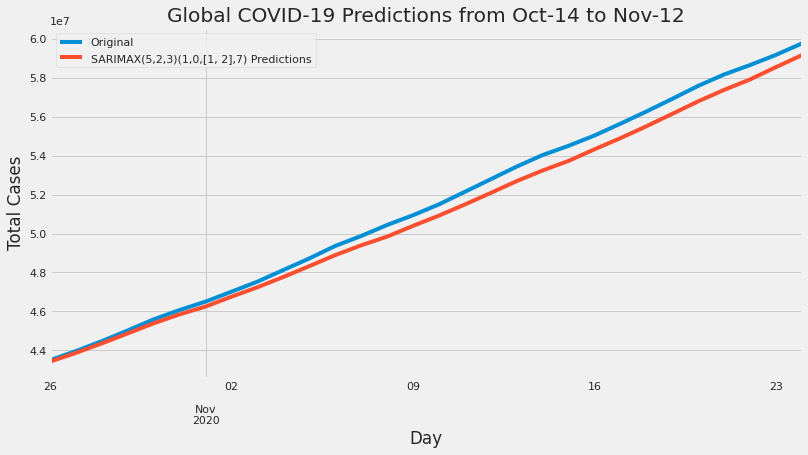

In [ ]:
title = 'Global COVID-19 Predictions from Oct-14 to Nov-12'
ylabel='Total Cases'
xlabel='Day'

ax = Global_test.rename('Original').plot(legend=True,figsize=(12,6),title=title)
global_preds.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Evaluating the model

In [ ]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(Global_test, global_preds)
print(f'SARIMAX(5, 2, 3)x(1, 0, [1, 2], 7) MSE Error: {error:11.10}')

SARIMAX(5, 2, 3)x(1, 0, [1, 2], 7) MSE Error: 3.188375625e+11


This model gives poor results on monthly forecasting, hence we will use weekly forecasting

## Weekly Forecasting

In [ ]:
Global = time_series[:].sum()
Global_train = Global[:(len(Global.index)-7)]
Global_test = Global[(len(Global.index)-7):]

In [ ]:
def index_to_date(ser, f='D'):
    ser.index = pd.to_datetime(ser.index)
    ser.index.freq = f

In [ ]:
index_to_date(Global)

In [ ]:
index_to_date(Global_train)

In [ ]:
Global_train

2020-01-22         555
2020-01-23         654
2020-01-24         941
2020-01-25        1434
2020-01-26        2118
                ...   
2020-11-13    53435351
2020-11-14    54029326
2020-11-15    54502332
2020-11-16    55030781
2020-11-17    55638883
Freq: D, Length: 301, dtype: int64

In [ ]:
index_to_date(Global_test)

In [ ]:
auto_arima(Global_train, start_p=1, max_p=15, start_q=1, max_q=15, seasonal=True, maxiter=3000, m=7).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:437: ModelFitWarning: Error fitting  ARIMA(1,2,1)(1,0,1)[7]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py", line 421, in _fit_candidate_model
    fit.fit(x, exogenous=xreg, **fit_params)
  File "/usr/local/lib/python3.6/dist-packages/pmdarima/arima/arima.py", line 472, in fit
    self._fit(y, exogenous, **fit_args)
  File "/usr/local/lib/python3.6/dist-packages/pmdarima/arima/arima.py", line 397, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.6/dist-packages/pmdarima/arima/arima.py", line 389, i

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  301
Model:             SARIMAX(6, 2, 0)x(1, 0, [1], 7)   Log Likelihood               -3379.691
Date:                             Wed, 25 Nov 2020   AIC                           6777.382
Time:                                     06:39:40   BIC                           6810.686
Sample:                                          0   HQIC                          6790.711
                                             - 301                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8363      0.057    -14.629      0.000      -0.948      -0.724
ar.L2         -0.6733      0.095     -7.103      0.000      -0.859      -0.488
ar.L3         -0.4427      0.134     -3.304      0.001      -0.705      -0.180
ar.L4         -0.2290      0.110     -2.089      0.037      -0.444      -0.014
ar.L5         -0.1807      0.094     -1.926      0.054      -0.365       0.003
ar.L6          0.0181      0.091      0.198      0.843      -0.161       0.197
ar.S.L7        0.9539      0.035     27.597      0.000       0.886       1.022
ma.S.L7       -0.4070      0.105     -3.877      0.000      -0.613      -0.201
sigma2      5.645e+08   8.87e-11   6.36e+18      0.000    5.64e+08    5.64e+08
===================================================================================
Ljung-Box (Q):                       66.63   Jarque-Bera (JB):              1039.43
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):              22.30   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.16e+34. Standard errors may be unstable.
"""

This provides an ARIMA Order of (2,2,2) combined with a seasonal order of (1,0,[1],7) Now let's train & test the SARIMAX(2,2,2)(1,0,[1],7) model, evaluate it, then produce a forecast of future values.

#### Fitting the model

In [ ]:
model = SARIMAX(global_df['Values'],order=(2,2,2),seasonal_order=(1,0,[1],7))
results = model.fit()
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              Values   No. Observations:                  278
Model:             SARIMAX(2, 2, 2)x(1, 0, [1], 7)   Log Likelihood               -3052.368
Date:                             Wed, 25 Nov 2020   AIC                           6118.735
Time:                                     06:39:41   BIC                           6144.078
Sample:                                 01-22-2020   HQIC                          6128.905
                                      - 10-25-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2886      0.419      0.688      0.491      -0.533       1.111
ar.L2         -0.2293      0.104     -2.206      0.027      -0.433      -0.026
ma.L1         -0.9894      0.428     -2.314      0.021      -1.827      -0.151
ma.L2          0.3548      0.297      1.196      0.232      -0.226       0.936
ar.S.L7        0.9726      0.026     37.442      0.000       0.922       1.024
ma.S.L7       -0.4998      0.109     -4.605      0.000      -0.713      -0.287
sigma2      3.649e+08   1.49e-09   2.45e+17      0.000    3.65e+08    3.65e+08
===================================================================================
Ljung-Box (Q):                       45.21   Jarque-Bera (JB):               455.86
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):              14.32   Skew:                             1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.88e+33. Standard errors may be unstable.
"""

#### Predicting the results

In [ ]:
start=len(Global_train)
end=len(Global_train)+len(Global_test)-1
global_preds = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(2,2,2)(1,0,[1],7) Predictions')

In [ ]:
global_preds

2020-11-18    5.558581e+07
2020-11-19    5.622049e+07
2020-11-20    5.686409e+07
2020-11-21    5.745205e+07
2020-11-22    5.799018e+07
2020-11-23    5.862988e+07
2020-11-24    5.924495e+07
Freq: D, Name: SARIMAX(2,2,2)(1,0,[1],7) Predictions, dtype: float64

In [ ]:
Global_test

2020-11-18    56262553
2020-11-19    56913120
2020-11-20    57579266
2020-11-21    58165570
2020-11-22    58649369
2020-11-23    59171078
2020-11-24    59759494
Freq: D, dtype: int64

In [ ]:
#Root mean squared error of the predictions with actual data
from statsmodels.tools.eval_measures import rmse

error = rmse(Global_test, global_preds)
print(f'SARIMAX(2,2,2)(1,0,[1],7) RMSE Error: {error:11.10}')

SARIMAX(2,2,2)(1,0,[1],7) RMSE Error: 649229.1401


#### Plotting the results

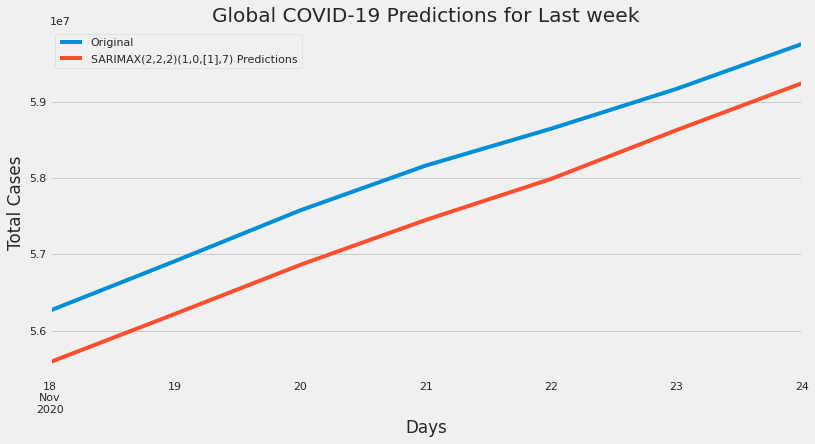

In [ ]:
title = 'Global COVID-19 Predictions for Last week'
ylabel='Total Cases'
xlabel='Days'

ax = Global_test.rename('Original').plot(legend=True,figsize=(12,6),title=title)
global_preds.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
model = SARIMAX(Global,order=(2,2,2),seasonal_order=(1,0,[1],7))
results = model.fit()
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  308
Model:             SARIMAX(2, 2, 2)x(1, 0, [1], 7)   Log Likelihood               -3461.487
Date:                             Wed, 25 Nov 2020   AIC                           6936.974
Time:                                     06:39:42   BIC                           6963.039
Sample:                                 01-22-2020   HQIC                          6947.398
                                      - 11-24-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6055      0.249      2.432      0.015       0.117       1.094
ar.L2         -0.0457      0.104     -0.438      0.661      -0.250       0.158
ma.L1         -1.4521      0.221     -6.583      0.000      -1.884      -1.020
ma.L2          0.6211      0.157      3.949      0.000       0.313       0.929
ar.S.L7        0.9600      0.023     41.460      0.000       0.915       1.005
ma.S.L7       -0.4446      0.052     -8.543      0.000      -0.547      -0.343
sigma2      5.696e+08   1.22e-10   4.65e+18      0.000     5.7e+08     5.7e+08
===================================================================================
Ljung-Box (Q):                       91.78   Jarque-Bera (JB):               957.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              26.42   Skew:                            -0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.23e+34. Standard errors may be unstable.
"""

#### Plotting

In [ ]:
start=len(Global)
end=len(Global)+len(Global_test)-1 #7 days into the future
final_preds = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(2,2,2)(1,0,[1],7) Predictions')

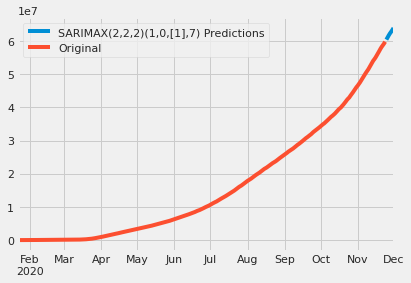

In [ ]:
final_preds.plot(legend=True)
Global.rename('Original').plot(legend=True)


#Weekly forecasting in India

#### Adjusting the indices

In [ ]:
India = time_series.loc['India']
India_train = India[:(len(Global.index)-7)]
India_test = India[(len(Global.index)-7):]

In [ ]:
index_to_date(India)

In [ ]:
India.isnull().sum()

0

In [ ]:
index_to_date(India_train)
index_to_date(India_test)

#### Augmented Dickey Fuller test on the Indian train set

In [ ]:
adf_test(India_train)

Augmented Dickey-Fuller Test: 
ADF test statistic       -0.617522
p-value                   0.866973
# lags used              16.000000
# observations          284.000000
critical value (1%)      -3.453587
critical value (5%)      -2.871771
critical value (10%)     -2.572222
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


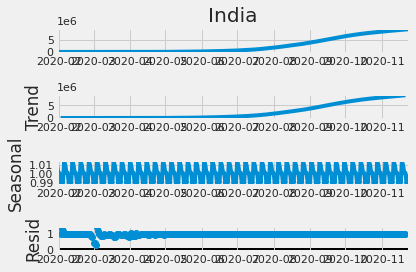

In [ ]:
result = seasonal_decompose(India[India>0], model='mul')
result.plot();
#Trend, Seasonal, Residuals

In [ ]:
auto_arima(India_train,exogenous=None, start_p=1, max_p=15, start_q=1, max_q=15, seasonal=True, maxiter=3000, m=7).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  301
Model:             SARIMAX(1, 2, 2)x(1, 0, [1], 7)   Log Likelihood               -2759.649
Date:                             Wed, 25 Nov 2020   AIC                           5531.298
Time:                                     06:40:46   BIC                           5553.501
Sample:                                          0   HQIC                          5540.184
                                             - 301                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8631      0.064     13.565      0.000       0.738       0.988
ma.L1         -1.4253      0.075    -19.129      0.000      -1.571      -1.279
ma.L2          0.5494      0.050     11.053      0.000       0.452       0.647
ar.S.L7        0.9675      0.020     47.286      0.000       0.927       1.008
ma.S.L7       -0.6095      0.046    -13.127      0.000      -0.701      -0.519
sigma2      5.918e+06   2.53e+05     23.403      0.000    5.42e+06    6.41e+06
===================================================================================
Ljung-Box (Q):                       88.81   Jarque-Bera (JB):              2791.70
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             403.66   Skew:                             1.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.99e+14. Standard errors may be unstable.
"""

In [ ]:
model = SARIMAX(India_train,order=(2,2,0),seasonal_order=(1,0,[1],7))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               India   No. Observations:                  301
Model:             SARIMAX(2, 2, 0)x(1, 0, [1], 7)   Log Likelihood               -2762.289
Date:                             Wed, 25 Nov 2020   AIC                           5534.579
Time:                                     06:40:48   BIC                           5553.081
Sample:                                 01-22-2020   HQIC                          5541.984
                                      - 11-17-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5386      0.041    -13.244      0.000      -0.618      -0.459
ar.L2         -0.2203      0.049     -4.515      0.000      -0.316      -0.125
ar.S.L7        0.9603      0.021     46.757      0.000       0.920       1.001
ma.S.L7       -0.5584      0.042    -13.227      0.000      -0.641      -0.476
sigma2      6.039e+06   2.73e+05     22.135      0.000     5.5e+06    6.57e+06
===================================================================================
Ljung-Box (Q):                       87.82   Jarque-Bera (JB):              2841.62
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             379.95   Skew:                             1.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Forecasting for 7 days

In [ ]:
start=len(India_train)
end=len(India_train)+len(India_test)-1 #7 days into the future
final_preds = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(2,2,0)x(1,0,[1],7) Predictions')

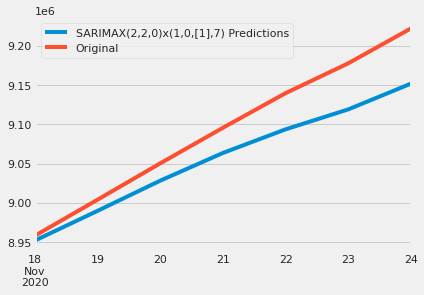

In [ ]:
final_preds.plot(legend=True)
India_test.rename('Original').plot(legend=True)

In [ ]:
error = rmse(India_test, final_preds)
print(f'SARIMAX(2,2,0)(1,0,[1],7) RMSE Error: {error:11.10}')

SARIMAX(2,2,0)(1,0,[1],7) RMSE Error: 41846.21994


#### Fitting on entire data

In [ ]:
auto_arima(India, start_p=1, max_p=15, start_q=1, max_q=15, seasonal=True, maxiter=3000, m=7).summary()

/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:437: ModelFitWarning: Error fitting  ARIMA(2,2,1)(2,0,2)[7]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py", line 421, in _fit_candidate_model
    fit.fit(x, exogenous=xreg, **fit_params)
  File "/usr/local/lib/python3.6/dist-packages/pmdarima/arima/arima.py", line 472, in fit
    self._fit(y, exogenous, **fit_args)
  File "/usr/local/lib/python3.6/dist-packages/pmdarima/arima/arima.py", line 397, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.6/dist-packages/pmdarima/arima/arima.py", line 389, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 659, in fit
    skip_hessian=True, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/statsmodels/ba

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  308
Model:             SARIMAX(2, 2, 0)x(1, 0, [1], 7)   Log Likelihood               -2831.296
Date:                             Wed, 25 Nov 2020   AIC                           5672.592
Time:                                     07:50:16   BIC                           5691.210
Sample:                                          0   HQIC                          5680.038
                                             - 308                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4867      0.042    -11.689      0.000      -0.568      -0.405
ar.L2         -0.1714      0.046     -3.716      0.000      -0.262      -0.081
ar.S.L7        0.9626      0.020     48.071      0.000       0.923       1.002
ma.S.L7       -0.5880      0.043    -13.617      0.000      -0.673      -0.503
sigma2      6.218e+06   2.84e+05     21.875      0.000    5.66e+06    6.78e+06
===================================================================================
Ljung-Box (Q):                       84.81   Jarque-Bera (JB):              2932.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             250.61   Skew:                             1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = SARIMAX(India,order=(0,2,2),seasonal_order=(1,0,[1],7))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               India   No. Observations:                  308
Model:             SARIMAX(0, 2, 2)x(1, 0, [1], 7)   Log Likelihood               -2831.850
Date:                             Wed, 25 Nov 2020   AIC                           5673.700
Time:                                     07:52:04   BIC                           5692.318
Sample:                                 01-22-2020   HQIC                          5681.146
                                      - 11-24-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4920      0.041    -11.927      0.000      -0.573      -0.411
ma.L2          0.1162      0.043      2.673      0.008       0.031       0.201
ar.S.L7        0.9637      0.020     48.749      0.000       0.925       1.002
ma.S.L7       -0.5887      0.043    -13.701      0.000      -0.673      -0.505
sigma2      6.238e+06   2.75e+05     22.701      0.000     5.7e+06    6.78e+06
===================================================================================
Ljung-Box (Q):                       88.18   Jarque-Bera (JB):              2672.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             247.61   Skew:                             1.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(India)
end=len(India)+len(India_test)-1 #7 days into the future
final_preds = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(0,2,2)x(1,0,[1],7) Predictions')

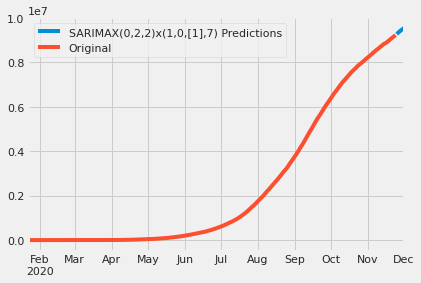

In [ ]:
final_preds.plot(legend=True)
India.rename('Original').plot(legend=True)